# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 8) ## default size
import seaborn as sns
import folium 
import geopandas as gpd
from pandas_profiling import ProfileReport

geo_df = gpd.read_file('data/us_state.json')
geo_df.rename(columns={'NAME':'State', 'STATE':'State Code'}, inplace=True)
geo_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,GEO_ID,State Code,State,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


# load cleaned data

In [2]:
act = pd.read_csv('data/act.csv') # 51 states * 3 years (153 rows)
sat = pd.read_csv('data/sat.csv') # 51 states * 3 years (153 rows)
both = pd.read_csv('data/both.csv') # 51 states * 3 years (153 rows)
both2 = pd.read_csv('data/both2.csv') # 51 states * 3 years * 2 tests (306 rows)

both

,Year,State,Participation_ACT,Composite_ACT,z_ACT,Participation_SAT,EBRW,Math,Total_SAT,z_SAT
0,2017,Alabama,1.00,19.2,-1.159348,0.05,593,572,1165,0.424770
1,2017,Alaska,0.65,19.8,-0.859466,0.38,547,533,1080,-0.503344
2,2017,Arizona,0.62,19.7,-0.909446,0.30,563,553,1116,-0.110260
3,2017,Arkansas,1.00,19.4,-1.059388,0.03,614,594,1208,0.894287
4,2017,California,0.31,22.8,0.639945,0.53,531,524,1055,-0.776319
...,...,...,...,...,...,...,...,...,...,...
148,2019,Virginia,0.21,24.0,1.166778,0.68,567,551,1119,0.061529
149,2019,Washington,0.24,22.1,0.292371,0.70,539,535,1074,-0.406051
150,2019,West Virginia,0.49,20.8,-0.305907,0.99,483,460,943,-1.767227
151,2019,Wisconsin,1.00,20.3,-0.536014,0.03,635,648,1283,1.765597


In [3]:
both2

,Year,State,Participation,Total,Test,z_score
0,2017,Alabama,1.00,19.2,ACT,-1.159348
1,2017,Alaska,0.65,19.8,ACT,-0.859466
2,2017,Arizona,0.62,19.7,ACT,-0.909446
3,2017,Arkansas,1.00,19.4,ACT,-1.059388
4,2017,California,0.31,22.8,ACT,0.639945
...,...,...,...,...,...,...
301,2019,Virginia,0.68,1119.0,SAT,0.061529
302,2019,Washington,0.70,1074.0,SAT,-0.406051
303,2019,West Virginia,0.99,943.0,SAT,-1.767227
304,2019,Wisconsin,0.03,1283.0,SAT,1.765597


# visualization
## correlations

In [4]:
## examples of 2017
## drop columns of each subject
col_to_drop = ['State','Year','EBRW','Math']

both[both['Year']==2017].drop(col_to_drop, axis=1).corr()

,Participation_ACT,Composite_ACT,z_ACT,Participation_SAT,Total_SAT,z_SAT
Participation_ACT,1.000000,-0.858134,-0.858134,-0.841234,0.701477,0.701477
Composite_ACT,-0.858134,1.000000,1.000000,0.694748,-0.445020,-0.445020
z_ACT,-0.858134,1.000000,1.000000,0.694748,-0.445020,-0.445020
Participation_SAT,-0.841234,0.694748,0.694748,1.000000,-0.867540,-0.867540
Total_SAT,0.701477,-0.445020,-0.445020,-0.867540,1.000000,1.000000
z_SAT,0.701477,-0.445020,-0.445020,-0.867540,1.000000,1.000000


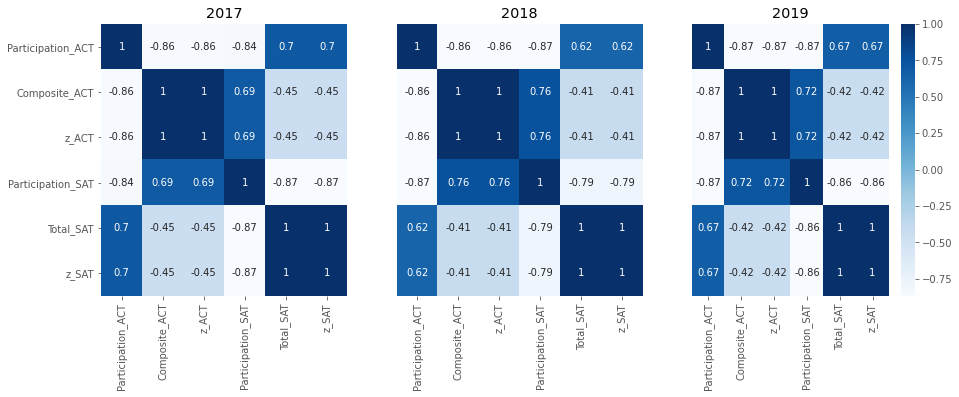

In [5]:
## to heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, year in enumerate(range(2017, 2020)):
    sns.heatmap(
        both[both['Year']==year].drop(col_to_drop, axis=1).corr(),
        ax=axes[i],
        cmap='Blues',
        yticklabels=[True,False,False][i], 
        cbar=[False,False,True][i], ## color bar for rightmost only
        annot=True).set_title(year)

## scatter

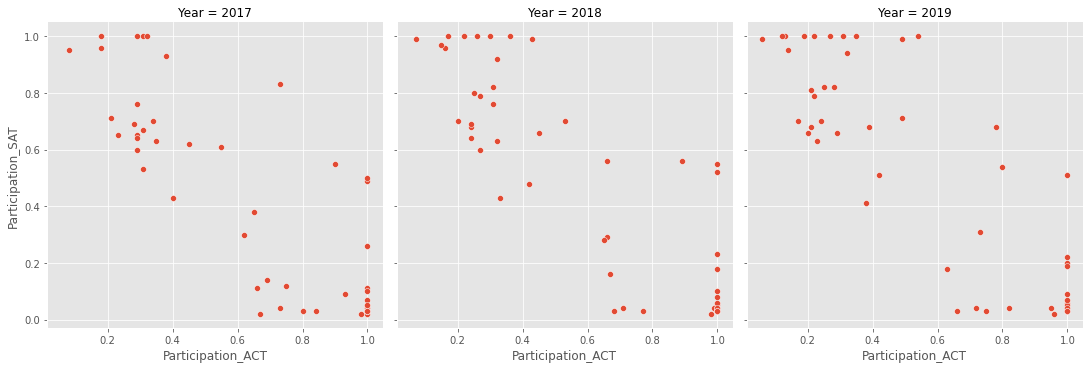

In [19]:
sns.relplot(
    data=both, 
    x="Participation_ACT", 
    y="Participation_SAT",
    col="Year",
    kind="scatter"
)

Text(0.5, 1.0, 'ACT Composite Score vs SAT Total Score')

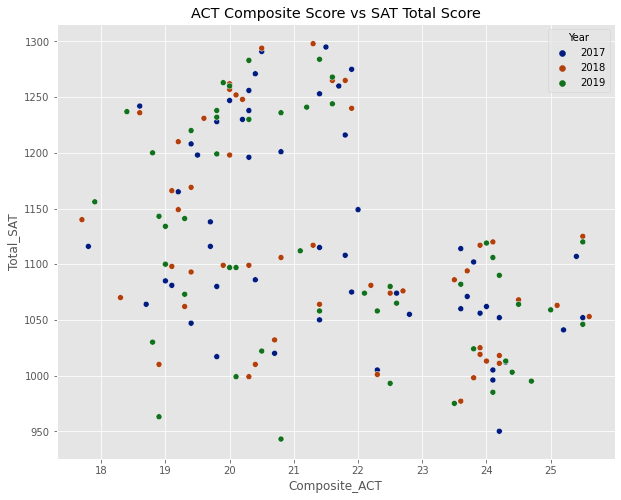

In [7]:
sns.scatterplot(
    x='Composite_ACT',
    y='Total_SAT',
    hue='Year',
    data=both,
    palette='dark'
).set_title('ACT Composite Score vs SAT Total Score')

## barplot

Text(0.5, 1.0, 'mean of particiaption')

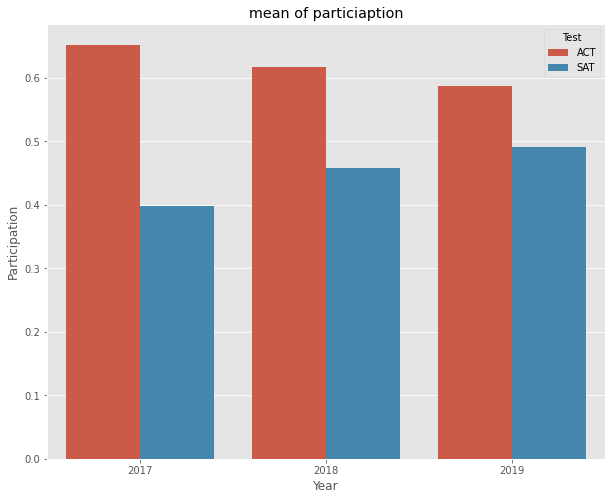

In [8]:
sns.barplot(
    x='Year',
    y='Participation',
    hue='Test',
    ci=None,
    data=both2).set_title('mean of particiaption')

Text(0.5, 1.0, 'Paticipation of 2017 and 2019')

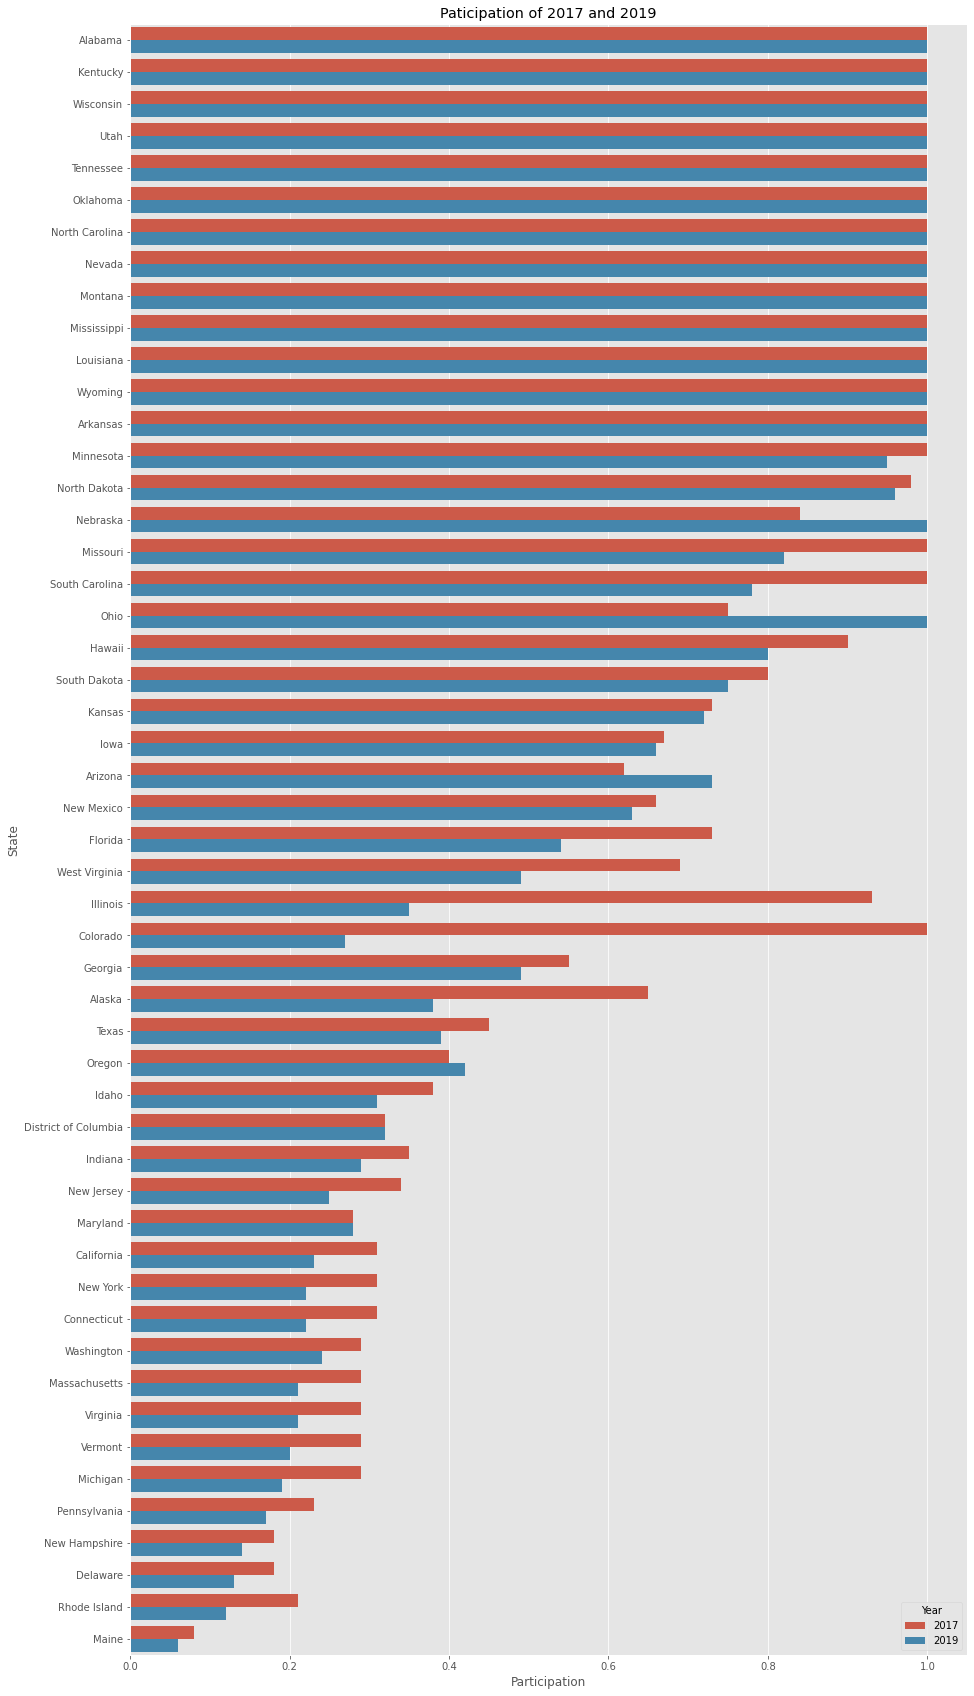

In [17]:
## Participation of 2017 and 2019 of each state 
plt.figure(figsize=(15, 30))
sns.barplot(
    y='State',
    x='Participation',
    hue='Year',
    order=act.groupby('State')['Participation'].mean().sort_values(ascending=False).index,
    data=act[act.Year.isin([2017,2019])]).set_title('Paticipation of 2017 and 2019')

## histgram of standardized score

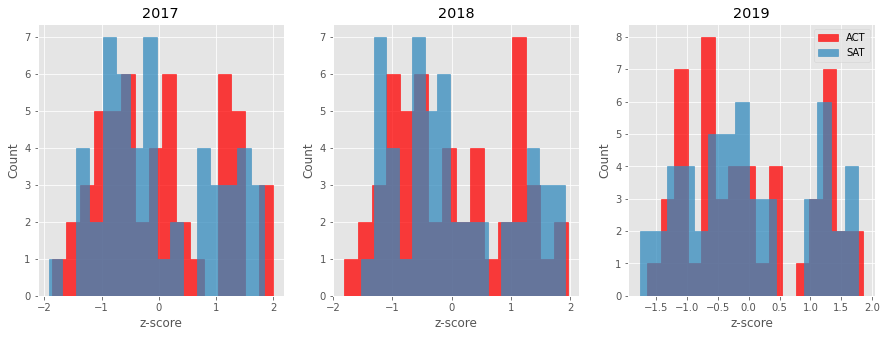

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for i, year in enumerate(range(2017,2020)):
    sns.histplot(
        ax=axes[i],
        x='z_ACT',
        data=both[both.Year==year],
        bins=16,
        color='r',
        element='step',
        label='ACT'
    ).set_title(year)
    sns.histplot(
        ax=axes[i],
        x='z_SAT',
        data=both[both.Year==year],
        bins=16,
        element='step',
        label='SAT'
    ).set(xlabel='z-score')
plt.legend()

## map

In [ ]:
# Initialize folium map.
act2017_map = folium.Map(
    location=[38, -100],
    zoom_start=4,
    tiles='cartodbpositron'
)
# Set up Choropleth map
folium.Choropleth(
    geo_data=geo_df,
    data=both[both['Year']==2017],
    columns=['State',"Participation_ACT"],
    key_on="feature.properties.State",
    fill_color='YlGnBu',
    fill_opacity=0.2,
    line_opacity=0.5,
    legend_name="Participation",
    smooth_factor=0,
    Highlight= True,
    line_color = "#0000"
).add_to(act2017_map)

act2017_map

In [ ]:
# Initialize folium map.
sat2017_map = folium.Map(
    location=[38, -100],
    zoom_start=4,
    tiles='cartodbpositron'
)
# Set up Choropleth map
folium.Choropleth(
    geo_data=geo_df,
    data=both[both['Year']==2017],
    columns=['State',"Participation_SAT"],
    key_on="feature.properties.State",
    fill_color='YlGnBu',
    fill_opacity=0.2,
    line_opacity=0.5,
    legend_name="Participation",
    smooth_factor=0,
    Highlight= True,
    line_color = "#0000"
).add_to(sat2017_map)

sat2017_map